In [269]:
# load csv files into dataframes 

import pandas as pd

# Loading Boston Globe dataset 
data1_b = pd.read_csv('/Users/rachelgupta/Desktop/NAACP - PIT NE/pitne-bias-in-media/summer24/Data/Combined_Datasets_3/2016/updated_bostonGlobe_2016.csv')

# census data, using 2010
data2_c = pd.read_csv('/Users/rachelgupta/Desktop/NAACP - PIT NE/pitne-bias-in-media/summer24/Data/2010_N.csv')

#dropping rows with 'No TRACTSfound'
data1_b.dropna(subset=['Tracts'], inplace=True)
data1_b.head()




,Unnamed: 0,hl1_x,body,llama_prediction,Explicit_Pass_1,NER_Pass_1,NER_Pass_1_Sorted,NER_Pass_1_Coordinates,NER_prediction,NER_Sorted,NER_Sorted_Coordinates,Tracts,position_section,position_subsection,hl1_y,hl2,author,lede,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned,longitude,latitude,tract_2010
0,1,tough time breaking the ice,it unacceptable that women college hockey does...,Based on the information provided in the art...,NaN,"[(the university of minnesota, 'ORG'), (couple...","[(the university of minnesota, 'ORG'), (the tu...",NaN,"[(the University of Minnesota, 'ORG'), (Minnea...","[('the University of Minnesota', 'ORG'), ('the...","[-94.6858998, 46.729553]",['960700'],SPORTS,unknown,tough time breaking the ice,bc has only all-female staff in division 1 hockey,unknown,the boston college women's hockey team takes t...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'STX...",2016,1002,' unacceptable women ' college hockey ' boast ...,-94.685900,46.729553,960700
1,2,top places new englanders like to go in winter,25 degrees average temperature across new engl...,Based on the information provided in the art...,NaN,"[(25 degrees, 'QUANTITY'), (new england, 'GPE'...","[(the white mountains, 'LOC'), (new england, '...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Logan Airport', 'FAC'), ('the Logan Airport...","[-71.0201972, 42.3665992]",['981300'],MAGAZINE,unknown,top places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,-71.020197,42.366599,981300
2,3,home design with art in mind,hill stead pope 33 000 square foot colonial re...,"Based on the article provided, I would guess...",NaN,"[(hill stead, 'GPE'), (33 000 square foot, 'QU...","[(mckim mead and white, 'ORG'), (avon old farm...",NaN,"[(Farmington, 'GPE'), (Connecticut, 'GPE'), (a...","[('Hill Stead Museum', 'FAC'), ('Mountain Road...","[-71.0588801, 42.3600825]",['030302'],SUNDAY,Travel,home design with art in mind,unknown,unknown,the restored sunken garden at hill-stead in fa...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'N71...",2016,794,"hill- stead , pope ' 33 , 000- square- foot co...",-71.058880,42.360082,30300
3,4,at least the hens won,earlier this year went to visit the country he...,Based on the information provided in the art...,NaN,"[(earlier this year, 'DATE'), (hubbardston, 'G...","[(congress, 'ORG'), (hubbardston, 'GPE'), (rho...",NaN,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (Bos...","[('Hubbardston', 'GPE'), ('Washington', 'GPE')...","[-72.0061877, 42.4737009]",['706100'],NEWS,Metro,at least the hens won,unknown,unknown,"well, i'm happy for the chickens. since tuesda...",2016-11-13,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,562,earlier year went visit country hen hubbardsto...,-72.006188,42.473701,706100
4,6,boy video brings autism awareness,it was so important because here is an autisti...,1. Y - The article is talking about a specif...,NaN,"[(11, 'DATE'), (maribel rueda, 'PERSON'), (rue...","[(latin america, 'LOC'), (colombia, 'GPE'), (n...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Massachuse...",[('The Federation for Children with Special Ne...,"[-71.0719817, 42.3843009]",['040600'],REGIONAL,West,boy video brings autism awareness,2014 clip has lasting effects,unknown,maribel rueda started a facebook group for fam...,2016-11-13,"{'subject': [{'score': '93', 'classCode': 'STX...",2016,771,"important autistic kid ' speak 11 , maribel ru...",-71.071982,42.384301,40600


In [270]:
# To examine full dataset without truncation 
pd.set_option('display.max_rows', None)  # None means display all rows
pd.set_option('display.max_columns', None)  # None means display all columns

In [271]:
#index names for boston globe data
data1_b.columns


Index(['Unnamed: 0', 'hl1_x', 'body', 'llama_prediction', 'Explicit_Pass_1',
       'NER_Pass_1', 'NER_Pass_1_Sorted', 'NER_Pass_1_Coordinates',
       'NER_prediction', 'NER_Sorted', 'NER_Sorted_Coordinates', 'Tracts',
       'position_section', 'position_subsection', 'hl1_y', 'hl2', 'author',
       'lede', 'pub_date', 'indexing_terms', 'year', 'actual_body_word_count',
       'body_cleaned', 'longitude', 'latitude', 'tract_2010'],
      dtype='object')

In [272]:
#index names for census data
data2_c.columns

Index(['geoid', 'cr_geoid', 'name', 'original_id', 'pop100', 'hu100',
       'state_place_fips'],
      dtype='object')

In [273]:
#processing boston globe data, the tracts are an array, making it into a list of strings
 
# cleaning function
def clean_tract(tract):
    return tract.strip("[]' ")

# Apply the function to the 'tract' column, replacing old column with this new info
data1_b['Tracts'] = data1_b['Tracts'].apply(clean_tract)

# Print the DataFrame to verify
#print(data1_b[['Tracts']].head())

data1_b.head()

,Unnamed: 0,hl1_x,body,llama_prediction,Explicit_Pass_1,NER_Pass_1,NER_Pass_1_Sorted,NER_Pass_1_Coordinates,NER_prediction,NER_Sorted,NER_Sorted_Coordinates,Tracts,position_section,position_subsection,hl1_y,hl2,author,lede,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned,longitude,latitude,tract_2010
0,1,tough time breaking the ice,it unacceptable that women college hockey does...,Based on the information provided in the art...,NaN,"[(the university of minnesota, 'ORG'), (couple...","[(the university of minnesota, 'ORG'), (the tu...",NaN,"[(the University of Minnesota, 'ORG'), (Minnea...","[('the University of Minnesota', 'ORG'), ('the...","[-94.6858998, 46.729553]",960700,SPORTS,unknown,tough time breaking the ice,bc has only all-female staff in division 1 hockey,unknown,the boston college women's hockey team takes t...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'STX...",2016,1002,' unacceptable women ' college hockey ' boast ...,-94.685900,46.729553,960700
1,2,top places new englanders like to go in winter,25 degrees average temperature across new engl...,Based on the information provided in the art...,NaN,"[(25 degrees, 'QUANTITY'), (new england, 'GPE'...","[(the white mountains, 'LOC'), (new england, '...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Logan Airport', 'FAC'), ('the Logan Airport...","[-71.0201972, 42.3665992]",981300,MAGAZINE,unknown,top places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,-71.020197,42.366599,981300
2,3,home design with art in mind,hill stead pope 33 000 square foot colonial re...,"Based on the article provided, I would guess...",NaN,"[(hill stead, 'GPE'), (33 000 square foot, 'QU...","[(mckim mead and white, 'ORG'), (avon old farm...",NaN,"[(Farmington, 'GPE'), (Connecticut, 'GPE'), (a...","[('Hill Stead Museum', 'FAC'), ('Mountain Road...","[-71.0588801, 42.3600825]",030302,SUNDAY,Travel,home design with art in mind,unknown,unknown,the restored sunken garden at hill-stead in fa...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'N71...",2016,794,"hill- stead , pope ' 33 , 000- square- foot co...",-71.058880,42.360082,30300
3,4,at least the hens won,earlier this year went to visit the country he...,Based on the information provided in the art...,NaN,"[(earlier this year, 'DATE'), (hubbardston, 'G...","[(congress, 'ORG'), (hubbardston, 'GPE'), (rho...",NaN,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (Bos...","[('Hubbardston', 'GPE'), ('Washington', 'GPE')...","[-72.0061877, 42.4737009]",706100,NEWS,Metro,at least the hens won,unknown,unknown,"well, i'm happy for the chickens. since tuesda...",2016-11-13,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,562,earlier year went visit country hen hubbardsto...,-72.006188,42.473701,706100
4,6,boy video brings autism awareness,it was so important because here is an autisti...,1. Y - The article is talking about a specif...,NaN,"[(11, 'DATE'), (maribel rueda, 'PERSON'), (rue...","[(latin america, 'LOC'), (colombia, 'GPE'), (n...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Massachuse...",[('The Federation for Children with Special Ne...,"[-71.0719817, 42.3843009]",040600,REGIONAL,West,boy video brings autism awareness,2014 clip has lasting effects,unknown,maribel rueda started a facebook group for fam...,2016-11-13,"{'subject': [{'score': '93', 'classCode': 'STX...",2016,771,"important autistic kid ' speak 11 , maribel ru...",-71.071982,42.384301,40600


In [274]:
#processing a subset of Census data, isolating location and geoid

d2_subset = data2_c[['geoid', 'name']]
d2_subset
d2_subset.dtypes   
# geoid is an int64, changinging from int64 to str

def int_to_string(num):
    "int to str"
    return str(num)

def get_list(subset, label):
    "get list"
    string_list = []
    for x in subset[label]:
        x= int_to_string(x)
        string_list.append(x)
    return string_list

string_geoid = get_list(d2_subset,'geoid')
string_geoid   #string list of geoid

# replace this list with column in Census
data2_c['geoid'] = string_geoid

data2_c.dtypes  # checks that type for geoid is a string(aka object)

geoid               object
cr_geoid             int64
name                object
original_id          int64
pop100               int64
hu100                int64
state_place_fips     int64
dtype: object

In [275]:
#Process geoid colum in census dataset, for each string do an approprioate slicing (5:11)

def calculate_tract(df):
    # Assuming the column name is 'column_name' and the DataFrame is 'df'
    new_list = []
    for x in df:
        sliced_string = x[5:11]  # Change the slice range as per your requirement
        new_list.append(sliced_string)
    return new_list


calc_t= calculate_tract(string_geoid)

#  add calculatedtract column to oG data set for census  # works 
data2_c['Calculated_Tract'] = calc_t
data2_c.head()    # type for calculated tract is object


,geoid,cr_geoid,name,original_id,pop100,hu100,state_place_fips,Calculated_Tract
0,250250703001010,178,Bay Village,33,49,5,2507000,070300
1,250250703001011,178,Bay Village,33,201,143,2507000,070300
2,250250703001012,178,Bay Village,33,324,235,2507000,070300
3,250250703001013,178,Bay Village,33,0,0,2507000,070300
4,250250703001014,178,Bay Village,33,5,5,2507000,070300


In [276]:
data2_c.dtypes

geoid               object
cr_geoid             int64
name                object
original_id          int64
pop100               int64
hu100                int64
state_place_fips     int64
Calculated_Tract    object
dtype: object

In [277]:
# Convert the 'Calculated_Tract' column to numeric, handling errors
data2_c['Calculated_Tract'] = pd.to_numeric(data2_c['Calculated_Tract'], errors='coerce')

In [278]:
# Convert the 'tract_2010' column to numeric, handling errors
data1_b['tract_2010'] = pd.to_numeric(data1_b['tract_2010'], errors='coerce')

In [279]:
data1_b.columns

Index(['Unnamed: 0', 'hl1_x', 'body', 'llama_prediction', 'Explicit_Pass_1',
       'NER_Pass_1', 'NER_Pass_1_Sorted', 'NER_Pass_1_Coordinates',
       'NER_prediction', 'NER_Sorted', 'NER_Sorted_Coordinates', 'Tracts',
       'position_section', 'position_subsection', 'hl1_y', 'hl2', 'author',
       'lede', 'pub_date', 'indexing_terms', 'year', 'actual_body_word_count',
       'body_cleaned', 'longitude', 'latitude', 'tract_2010'],
      dtype='object')

In [280]:


new_census_subset =  data2_c[['Calculated_Tract', 'name']]

# this new dataset wil be merged with other census on Tract and Calculated Tract





merged_data = data1_b.merge(new_census_subset[['Calculated_Tract','name']] , left_on='tract_2010', right_on= "Calculated_Tract", how='left')


merged_data.head()



,Unnamed: 0,hl1_x,body,llama_prediction,Explicit_Pass_1,NER_Pass_1,NER_Pass_1_Sorted,NER_Pass_1_Coordinates,NER_prediction,NER_Sorted,NER_Sorted_Coordinates,Tracts,position_section,position_subsection,hl1_y,hl2,author,lede,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned,longitude,latitude,tract_2010,Calculated_Tract,name
0,1,tough time breaking the ice,it unacceptable that women college hockey does...,Based on the information provided in the art...,NaN,"[(the university of minnesota, 'ORG'), (couple...","[(the university of minnesota, 'ORG'), (the tu...",NaN,"[(the University of Minnesota, 'ORG'), (Minnea...","[('the University of Minnesota', 'ORG'), ('the...","[-94.6858998, 46.729553]",960700,SPORTS,unknown,tough time breaking the ice,bc has only all-female staff in division 1 hockey,unknown,the boston college women's hockey team takes t...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'STX...",2016,1002,' unacceptable women ' college hockey ' boast ...,-94.685900,46.729553,960700,NaN,NaN
1,2,top places new englanders like to go in winter,25 degrees average temperature across new engl...,Based on the information provided in the art...,NaN,"[(25 degrees, 'QUANTITY'), (new england, 'GPE'...","[(the white mountains, 'LOC'), (new england, '...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Logan Airport', 'FAC'), ('the Logan Airport...","[-71.0201972, 42.3665992]",981300,MAGAZINE,unknown,top places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,-71.020197,42.366599,981300,981300.0,East Boston
2,2,top places new englanders like to go in winter,25 degrees average temperature across new engl...,Based on the information provided in the art...,NaN,"[(25 degrees, 'QUANTITY'), (new england, 'GPE'...","[(the white mountains, 'LOC'), (new england, '...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Logan Airport', 'FAC'), ('the Logan Airport...","[-71.0201972, 42.3665992]",981300,MAGAZINE,unknown,top places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,-71.020197,42.366599,981300,981300.0,East Boston
3,2,top places new englanders like to go in winter,25 degrees average temperature across new engl...,Based on the information provided in the art...,NaN,"[(25 degrees, 'QUANTITY'), (new england, 'GPE'...","[(the white mountains, 'LOC'), (new england, '...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Logan Airport', 'FAC'), ('the Logan Airport...","[-71.0201972, 42.3665992]",981300,MAGAZINE,unknown,top places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,-71.020197,42.366599,981300,981300.0,East Boston
4,2,top places new englanders like to go in winter,25 degrees average temperature across new engl...,Based on the information provided in the art...,NaN,"[(25 degrees, 'QUANTITY'), (new england, 'GPE'...","[(the white mountains, 'LOC'), (new england, '...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Logan Airport', 'FAC'), ('the Logan Airport...","[-71.0201972, 42.3665992]",981300,MAGAZINE,unknown,top places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,-71

In [281]:


merged_data = merged_data.drop_duplicates(subset=["Unnamed: 0"])


In [282]:

#Figuring Out how many articles appear in each neighborhood 

import pandas as pd

# Assuming the merged data is stored in a variable called 'merged_data'
frequencyy = merged_data['name'].value_counts().reset_index()

# Rename the columns in the dataframe
frequencyy.columns = ['Name', 'Count']

# Display the dataframe
frequencyy



,Name,Count
0,North End,986
1,West End,238
2,Fenway,185
3,Leather District,93
4,Beacon Hill,86
5,Back Bay,79
6,Dorchester,64
7,Brighton,63
8,South Boston Waterfront,55
9,Roxbury,50


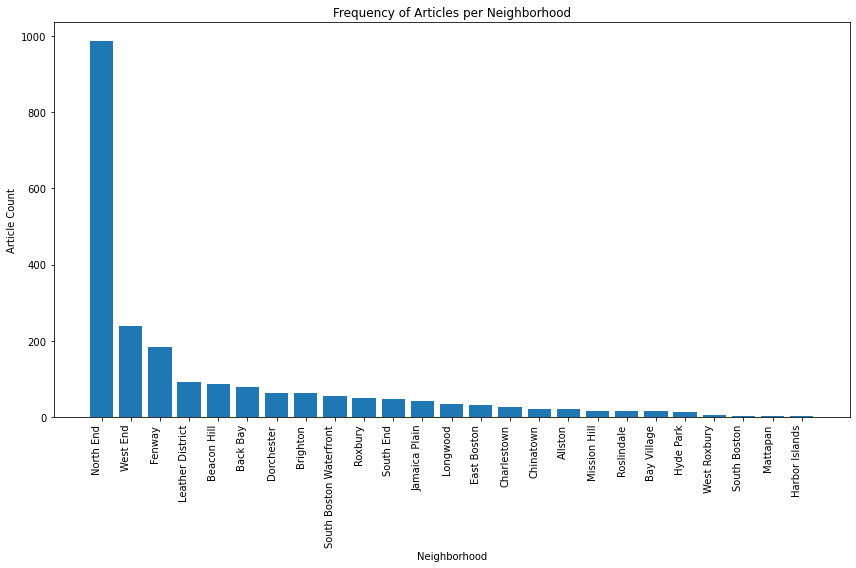

In [283]:
import matplotlib.pyplot as plt

# Define the variables
locations = frequencyy['Name']  
counts = frequencyy['Count']  


# Create the bar plot to visualize the articles perneighborhood
plt.figure(figsize=(12, 8))
plt.bar(locations, counts)
plt.title('Frequency of Articles per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Article Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [284]:
# Rachel's merged race document, for race per neighborhood

# loadd csv files
data3_r = pd.read_csv('/Users/rachelgupta/Desktop/NAACP - PIT NE/pitne-bias-in-media/summer24/Data/redistricting_data_tract20_nbhd_hhpopsize_ab-1.csv')

#load colum names, # tract20_nbhd  for neighborhood name
data3_r.columns

#data3_r



Index(['tract20_nbhd', 'P0020001', 'P0020005', 'P0020006', 'P0020002',
       'P002aapi', 'P002others', 'P0040001', 'P0040005', 'P0040006',
       'P0040002', 'P004aapi', 'P004others', 'P00x0001', 'P00x0005',
       'P00x0006', 'P00x0002', 'P00xaapi', 'P00xothers', 'hhpop', 'P0050001',
       'P0050002', 'P0050003', 'P0050004', 'P0050005', 'P0050006', 'P0050007',
       'P0050008', 'P0050009', 'P0050010', 'H0010001', 'H0010002', 'H0010003',
       'hhsize'],
      dtype='object')

In [285]:
#  Getting rid of iirelevant columns from race document

race = data3_r.drop(columns = ['P0040001', 'P0040005', 'P0040006',
       'P0040002', 'P004aapi', 'P004others', 'P00x0001', 'P00x0005',
       'P00x0006', 'P00x0002', 'P00xaapi', 'P00xothers', 'hhpop', 'P0050001',
       'P0050002', 'P0050003', 'P0050004', 'P0050005', 'P0050006', 'P0050007',
       'P0050008', 'P0050009', 'P0050010', 'H0010001', 'H0010002', 'H0010003',
       'hhsize'])

race.rename(columns={"P0020005": "White alone", 
                            "P0020006": "Black or African American alone", 
                            "P0020002": "Hispanic or Latino", 
                            "P0020008": "Asian alone", 
                            "P0020007": "American Indian and Alaska Native alone", 
                            "P0020009": "Native Hawaiian and Other Pacific Islander alone", 
                            "P0020010": "Some Other Race alone", 
                            "P002aapi":"Asian, Native Hawaiian and Pacific Islander",
                            "P002others":"Other Races or Multiple Races",
                            "P0020011":"Population of two or more races",
                            "P0020001":"Total",
                            "tract20_nbhd":"Neighborhood"}, inplace=True)

 

race = race.drop(0)


In [286]:
# merge race w merged document containing neighborhoods

all_data = merged_data.merge(race,left_on='name', right_on='Neighborhood', how='left')
all_data.head()



,Unnamed: 0,hl1_x,body,llama_prediction,Explicit_Pass_1,NER_Pass_1,NER_Pass_1_Sorted,NER_Pass_1_Coordinates,NER_prediction,NER_Sorted,NER_Sorted_Coordinates,Tracts,position_section,position_subsection,hl1_y,hl2,author,lede,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned,longitude,latitude,tract_2010,Calculated_Tract,name,Neighborhood,Total,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander",Other Races or Multiple Races
0,1,tough time breaking the ice,it unacceptable that women college hockey does...,Based on the information provided in the art...,NaN,"[(the university of minnesota, 'ORG'), (couple...","[(the university of minnesota, 'ORG'), (the tu...",NaN,"[(the University of Minnesota, 'ORG'), (Minnea...","[('the University of Minnesota', 'ORG'), ('the...","[-94.6858998, 46.729553]",960700,SPORTS,unknown,tough time breaking the ice,bc has only all-female staff in division 1 hockey,unknown,the boston college women's hockey team takes t...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'STX...",2016,1002,' unacceptable women ' college hockey ' boast ...,-94.685900,46.729553,960700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,top places new englanders like to go in winter,25 degrees average temperature across new engl...,Based on the information provided in the art...,NaN,"[(25 degrees, 'QUANTITY'), (new england, 'GPE'...","[(the white mountains, 'LOC'), (new england, '...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Logan Airport', 'FAC'), ('the Logan Airport...","[-71.0201972, 42.3665992]",981300,MAGAZINE,unknown,top places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,-71.020197,42.366599,981300,981300.0,East Boston,East Boston,43066,15760,1403,21700,1932,2271
2,3,home design with art in mind,hill stead pope 33 000 square foot colonial re...,"Based on the article provided, I would guess...",NaN,"[(hill stead, 'GPE'), (33 000 square foot, 'QU...","[(mckim mead and white, 'ORG'), (avon old farm...",NaN,"[(Farmington, 'GPE'), (Connecticut, 'GPE'), (a...","[('Hill Stead Museum', 'FAC'), ('Mountain Road...","[-71.0588801, 42.3600825]",030302,SUNDAY,Travel,home design with art in mind,unknown,unknown,the restored sunken garden at hill-stead in fa...,2016-11-13,"{'subject': [{'score': '90', 'classCode': 'N71...",2016,794,"hill- stead , pope ' 33 , 000- square- foot co...",-71.058880,42.360082,30300,30300.0,North End,North End,10805,9306,141,528,445,385
3,4,at least the hens won,earlier this year went to visit the country he...,Based on the information provided in the art...,NaN,"[(earlier this year, 'DATE'), (hubbardston, 'G...","[(congress, 'ORG'), (hubbardston, 'GPE'), (rho...",NaN,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (Bos...","[('Hubbardston', 'GPE'), ('Washington', 'GPE')...","[-72.0061877, 42.4737009]",706100,NEWS,Metro,at least the hens won,unknown,unknown,"well, i'm happy for the chickens. since tuesda...",2016-11-13,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,562,earlier year went visit country hen hubbardsto...,-72.006188,42.473701,706100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,boy video brings autism awareness,it was so important because here is an autisti...,1. Y - The article is talking about a specif...,NaN,"[(11, 'DATE'), (maribel rueda, 'PERSON'), (rue...","[(latin america, 'LOC'), (colombia, 'GPE'), (n...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Massachuse...",[('The Federation for Children with Special Ne...,"[-71.0719817, 42.3843009]",040600,REGIONAL,West,boy video brings autism awareness,2014 clip has lasting effects,unknown,maribel rueda started a facebook group for fam...,2016-11-13,"{'subject': [{'score': '93', 'classCode': 'STX...",2016,771,"important autistic kid ' speak

In [287]:
# creating race df 
max_race_df = pd.DataFrame(race)

# dropping total column because it has the highest count
max_race1= max_race_df.drop(columns= ['Total'])
                        
#calculating highest race

max_race1.set_index("Neighborhood", inplace=True)
new_df_num = max_race1.apply(pd.to_numeric, errors='coerce')

# Identifying the highest race for each tract and adding a new column
max_race1["majority_race"] = new_df_num.idxmax(axis=1)

# Displaying the updated dataframe
max_race1.reset_index(inplace=True)
max_race1.head()

#conjoin all






,Neighborhood,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander",Other Races or Multiple Races,majority_race
0,Allston,12536,1326,3259,6271,1512,White alone
1,Back Bay,13065,690,1208,2410,817,White alone
2,Beacon Hill,7521,252,537,630,396,White alone
3,Brighton,32694,2414,5376,8703,2860,White alone
4,Charlestown,13626,990,2075,1650,779,White alone


In [242]:
# merge race with final dataset

#finalized = all_data.merge(max_race1,left_on='name', right_on='Neighborhood', how='inner')

#finalized.columns



In [288]:

complete = merged_data.merge( max_race1,left_on='name', right_on='Neighborhood', how='inner' )

completefinal = complete.drop_duplicates(subset=['Unnamed: 0'])


#complete.to_csv('2010complete.csv', index=False)

completefinal.head()

,Unnamed: 0,hl1_x,body,llama_prediction,Explicit_Pass_1,NER_Pass_1,NER_Pass_1_Sorted,NER_Pass_1_Coordinates,NER_prediction,NER_Sorted,NER_Sorted_Coordinates,Tracts,position_section,position_subsection,hl1_y,hl2,author,lede,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned,longitude,latitude,tract_2010,Calculated_Tract,name,Neighborhood,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander",Other Races or Multiple Races,majority_race
0,2,top places new englanders like to go in winter,25 degrees average temperature across new engl...,Based on the information provided in the art...,NaN,"[(25 degrees, 'QUANTITY'), (new england, 'GPE'...","[(the white mountains, 'LOC'), (new england, '...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Logan Airport', 'FAC'), ('the Logan Airport...","[-71.0201972, 42.3665992]",981300,MAGAZINE,unknown,top places new englanders like to go in winter,our favorite destinations aren't all warm — pl...,By Marisa Dellatto,> $141.17 — average cost of a night in a mass....,2016-11-13,"{'subject': [{'score': '91', 'classCode': 'ST0...",2016,176,25 degrees average temperature across new engl...,-71.020197,42.366599,981300,981300.0,East Boston,East Boston,15760,1403,21700,1932,2271,Hispanic or Latino
1,84,new england in brief,bermuda bound jet detours to logan jetblue pla...,Based on the information provided in the art...,NaN,"[(bermuda, 'GPE'), (jetblue, 'ORG'), (new york...","[(jetblue, 'ORG'), (jetblue, 'ORG'), (the verm...",NaN,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (Bos...","[('the Logan International Airport', 'FAC'), (...","[-71.0201972, 42.3665992]",981300,NEWS,Metro,new england in brief,unknown,unknown,chelsea child getting off bus is struck by car...,2016-09-20,"{'legal': [{'className': 'Governments', 'class...",2016,496,bermuda- bound jet detours logan jetblue plane...,-71.020197,42.366599,981300,981300.0,East Boston,East Boston,15760,1403,21700,1932,2271,Hispanic or Latino
2,134,test your mass. history smarts,so in addition to being known for the shot hea...,Based on the information provided in the art...,NaN,"[(glynn, 'PERSON'), (boston, 'GPE'), (this sum...","[(jetblue, 'ORG'), (framingham state universit...",NaN,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (Bos...","[('Logan Airport', 'FAC'), ('Government Center...","[-71.0201972, 42.3665992]",981300,BUSINESS,unknown,test your mass. history smarts,unknown,unknown,"this summer, logan airport will debut a major ...",2016-05-29,{'legal': [{'className': 'Business & Corporate...,2016,951,"addition known shot heard round world , glynn ...",-71.020197,42.366599,981300,981300.0,East Boston,East Boston,15760,1403,21700,1932,2271,Hispanic or Latino
3,174,still rolling along,body but taxi company was born and raised in f...,Based on the information provided in the art...,NaN,"[(framingham, 'GPE'), (jo anne thompson, 'PERS...","[(tommy taxi, 'ORG'), (lyft, 'ORG'), (uber tom...",NaN,"[(Framingham, 'GPE'), (Massachusetts, 'GPE'), ...","[('Logan Airport', 'FAC'), ('Logan Airport', '...","[-71.0201972, 42.3665992]",981300,REGIONAL,West,still rolling along,"for 70 years, tommy's taxi in framingham has s...",unknown,jo-anne thompson (right) with dispatcher bob c...,2016-11-27,"{'subject': [{'score': '90', 'classCode': 'ST0...",2016,888,"body taxi company ? born raised framingham , t...",-71.020197,42.366599,981300,981300.0,East Boston,East Boston,15760,1403,21700,1932,2271,Hispanic or Latino
4,467,international terminal size an issue,body it is not uncommon to have more than five...,Based on the information provided in the art...,NaN,"[(more than five, 'CARDINAL'), (the same hour,...","[(massport, 'ORG'), (glynn, 'ORG'), (massport,...",NaN,"[(Logan International Airport, 'FAC'), (Boston...","[('Logan International Airport', 'FAC'), ('Log...","[-71.0201972, 42.3665992]",981300,BUSINESS,unknown,international terminal size an issue,"wait times improve, but more flights are coming",unk

In [289]:
completefinal.info

<bound method DataFrame.info of       Unnamed: 0                                              hl1_x  \
0              2     top places new englanders like to go in winter   
1             84                               new england in brief   
2            134                     test your mass. history smarts   
3            174                                still rolling along   
4            467               international terminal size an issue   
5            851        worries about militarizing police misplaced   
6            887            american science and engineering bought   
7           1111             charged with drug trafficking at logan   
8           1120  kudos to the bpd for cracking down on loud mot...   
9           1202                       thanks for everything boston   
10          1306  for ed freeman it really has been long and win...   
11          1443          can big labor retool for the age of trump   
12          1453                             

In [290]:
completefinal.to_csv('2016complete.csv', index=False)

In [ ]:
completefinal